# Sample 15arc-sec GEBCO_2023.nc on OM4p25 grid

## Apply edits to the topography.

## Region 18: 30,50,-300,-180,

In [1]:
# Notebook editor: John Krasting

# This notebook originated from Stephen Griffies, with many other contributors:
# Stephen.Griffies
# Alistair.Adcroft
# Robert.Hallberg
# Niki.Zadeh
# Raphael.Dussin

In [2]:
Region_Boundaries = [30,50,-245,-180]
Region_Name = '18: Sea of Japan / East China Sea'

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import netCDF4
import xarray as xr
import cmocean
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import sys
sys.path.insert(1, './tools/')
from topo_tools import *

Resolution = 240 cells/degree
GEBCO loaded with (nj,ni) =  (43200, 86400)  min(lon) =  -300.0  max(lon) =  60.0


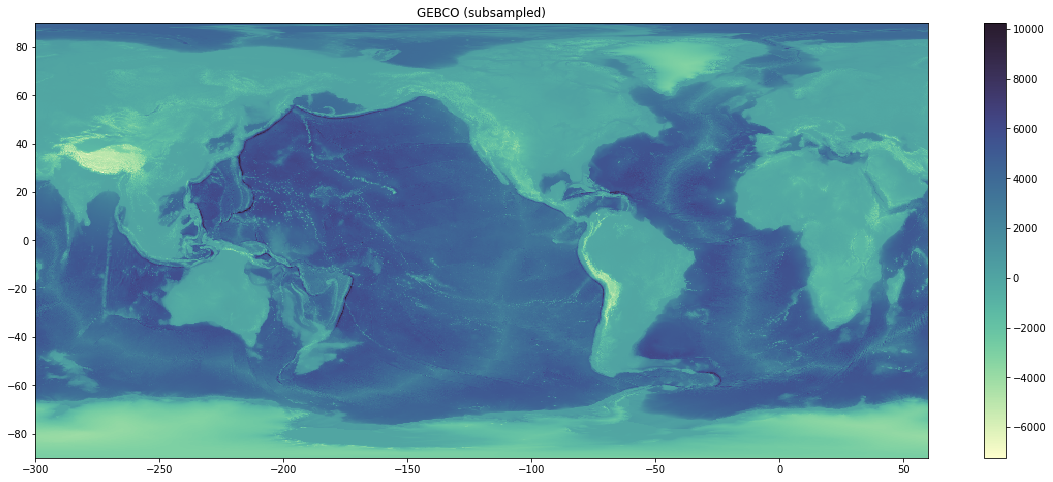

In [4]:
# GEBCO-2020 + Bedmachine combined topography 

fname_gebco  = "/archive/gold/datasets/topography/GEBCO_2023/GEBCO_2023.nc"

GEBCO = GEBCO_data(fname_gebco)

plt.figure(figsize=(20,8))
plt.pcolormesh(GEBCO.lonq[::100], GEBCO.latq[::100], GEBCO.depth[::100,::100], cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('GEBCO (subsampled)');

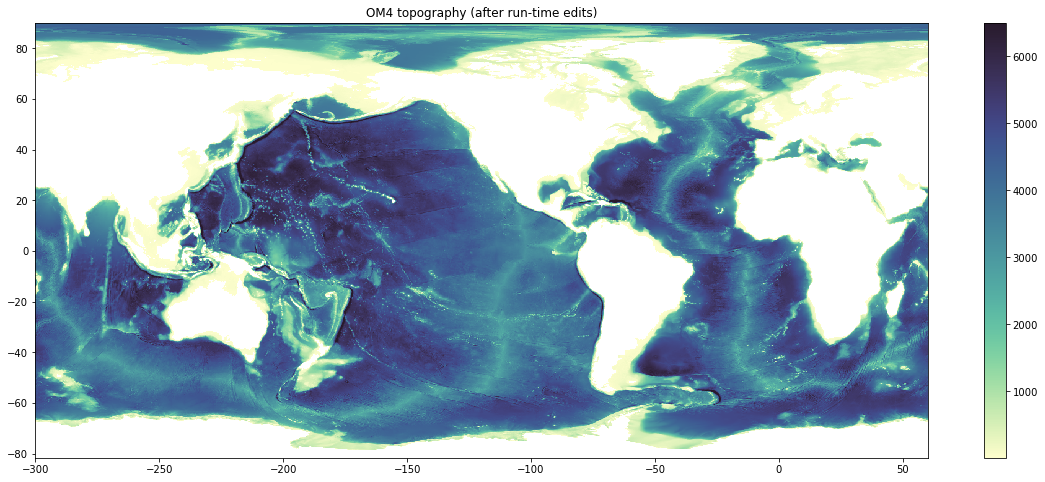

In [5]:
OM4 = OM4_data('/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_hgrid.nc',
               '/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_static.nc',
               '/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_mask.nc')
plt.figure(figsize=(20,8))
plt.pcolormesh(OM4.lonq, OM4.latq, OM4.depth, cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('OM4 topography (after run-time edits)');

OM5 longitudes are inconsistent!
OM5 latitudes are inconsistent!


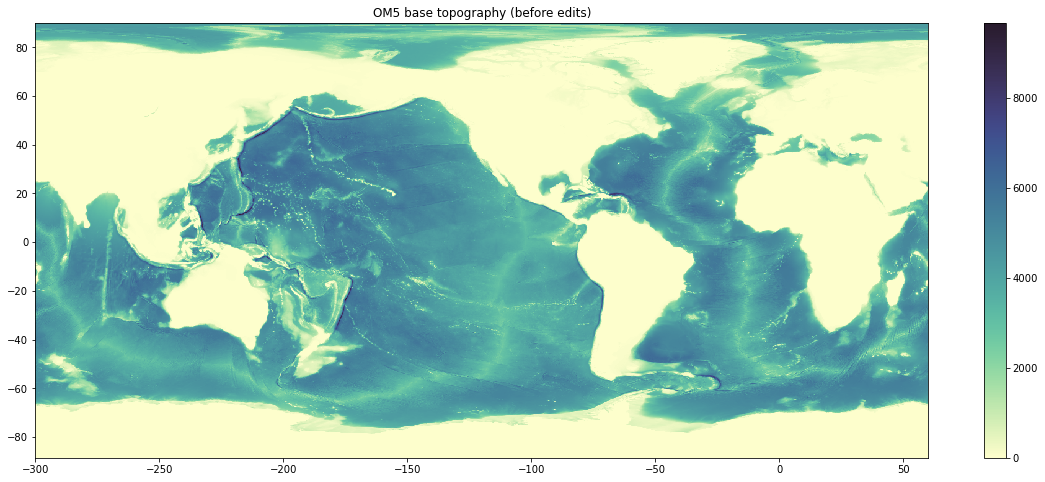

In [6]:
OM5 = OM5_data('ocean_hgrid.nc',
               'regridded_source_topog.nc')

plt.figure(figsize=(20,8))
plt.pcolormesh(OM5.lonq, OM5.latq, OM5.depth, cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('OM5 base topography (before edits)');

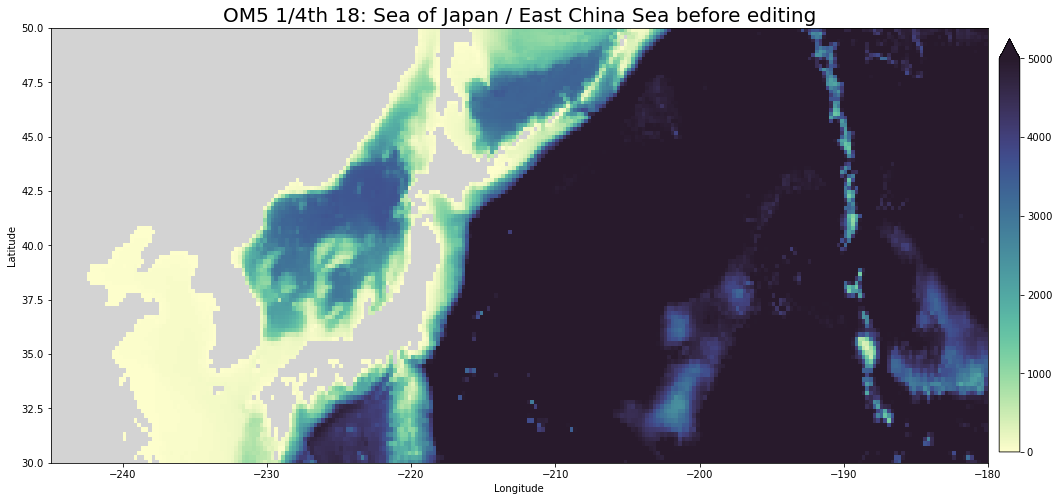

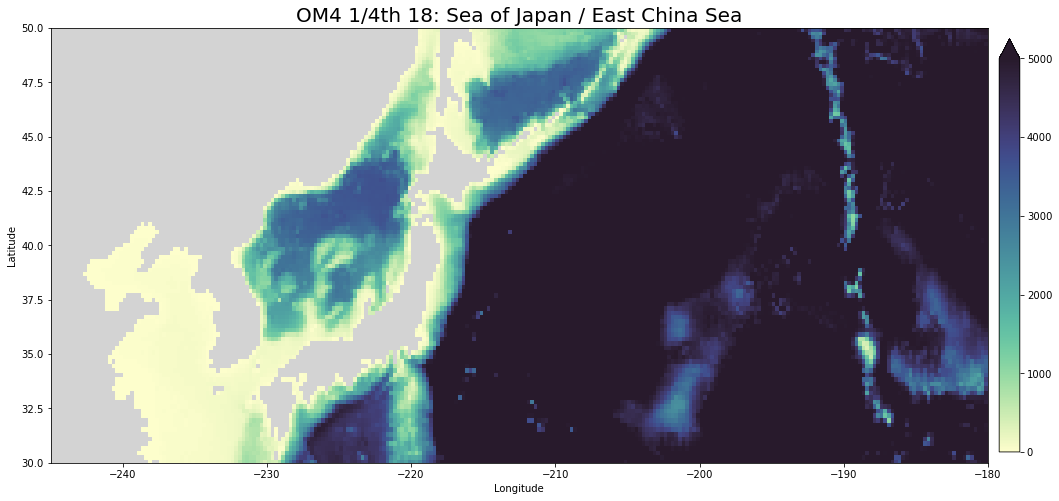

In [7]:
# Broad view of region before edits 

broadview(OM4,OM5,
          (Region_Boundaries[2],Region_Boundaries[3]),
          (Region_Boundaries[0],Region_Boundaries[1]),
          0, 5000, Region_Name, om4=True, new=False)

(-236.9, 16.2)
Gebco (js:je,is:ie) = 28799:31199,13200:17087
OM4 model (js:je,is:ie) = 628:679,218:285
OM5 model (js:je,is:ie) = 709:760,218:285
Using xlim = (-245.0, -228.8) ylim = (30.0, 40.0)
(-236.9, 16.2)
Gebco (js:je,is:ie) = 31199:33599,13200:17087
OM4 model (js:je,is:ie) = 677:736,218:285
OM5 model (js:je,is:ie) = 758:817,218:285
Using xlim = (-245.0, -228.8) ylim = (40.0, 50.0)
(-220.6, 16.2)
Gebco (js:je,is:ie) = 28799:31199,17112:21000
OM4 model (js:je,is:ie) = 628:679,284:350
OM5 model (js:je,is:ie) = 709:760,284:350
Using xlim = (-228.7, -212.5) ylim = (30.0, 40.0)
(-220.6, 16.2)
Gebco (js:je,is:ie) = 31199:33599,17112:21000
OM4 model (js:je,is:ie) = 677:736,284:350
OM5 model (js:je,is:ie) = 758:817,284:350
Using xlim = (-228.7, -212.5) ylim = (40.0, 50.0)
(-204.4, 16.2)
Gebco (js:je,is:ie) = 28799:31199,21000:24887
OM4 model (js:je,is:ie) = 628:679,348:415
OM5 model (js:je,is:ie) = 709:760,348:415
Using xlim = (-212.5, -196.3) ylim = (30.0, 40.0)


/home/Mitchell.Bushuk/scripts/OM5/topo_edits/./tools/topo_tools.py:202: UserWarning: No contour levels were found within the data range.
  thisax.contour(GEBCO.lonh[Gis:Gie], GEBCO.lath[Gjs:Gje], zmask( GEBCO.depth[Gjs:Gje,Gis:Gie] ),


(-204.4, 16.2)
Gebco (js:je,is:ie) = 31199:33599,21000:24887
OM4 model (js:je,is:ie) = 677:736,348:415
OM5 model (js:je,is:ie) = 758:817,348:415
Using xlim = (-212.5, -196.3) ylim = (40.0, 50.0)
(-188.1, 16.2)
Gebco (js:je,is:ie) = 28799:31199,24912:28799
OM4 model (js:je,is:ie) = 628:679,414:480
OM5 model (js:je,is:ie) = 709:760,414:480
Using xlim = (-196.2, -180.0) ylim = (30.0, 40.0)
(-188.1, 16.2)
Gebco (js:je,is:ie) = 31199:33599,24912:28799
OM4 model (js:je,is:ie) = 677:736,414:480
OM5 model (js:je,is:ie) = 758:817,414:480
Using xlim = (-196.2, -180.0) ylim = (40.0, 50.0)


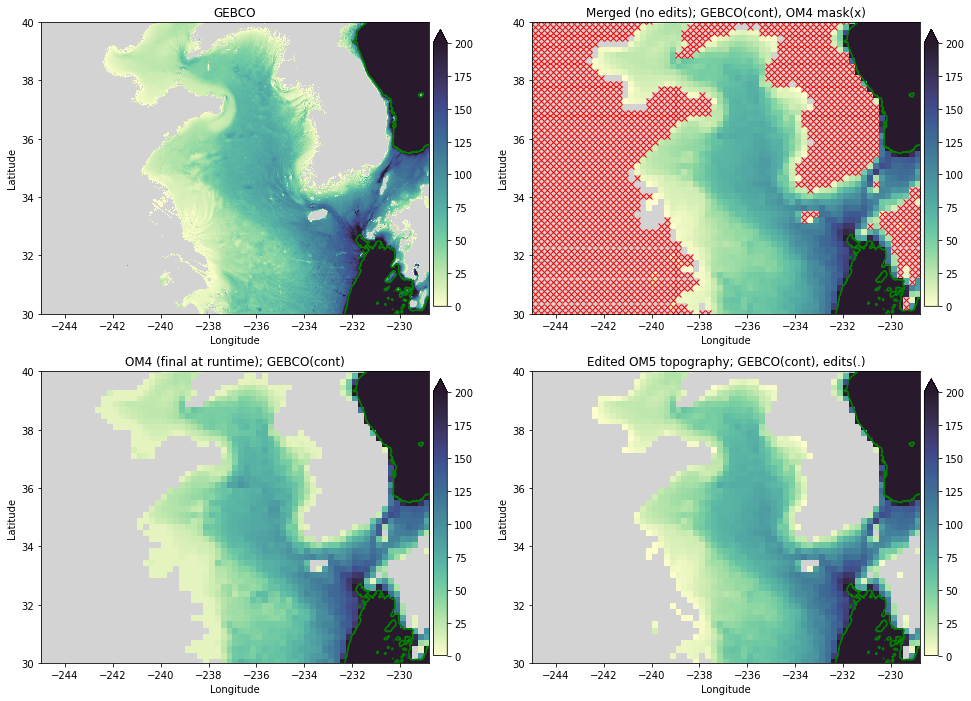

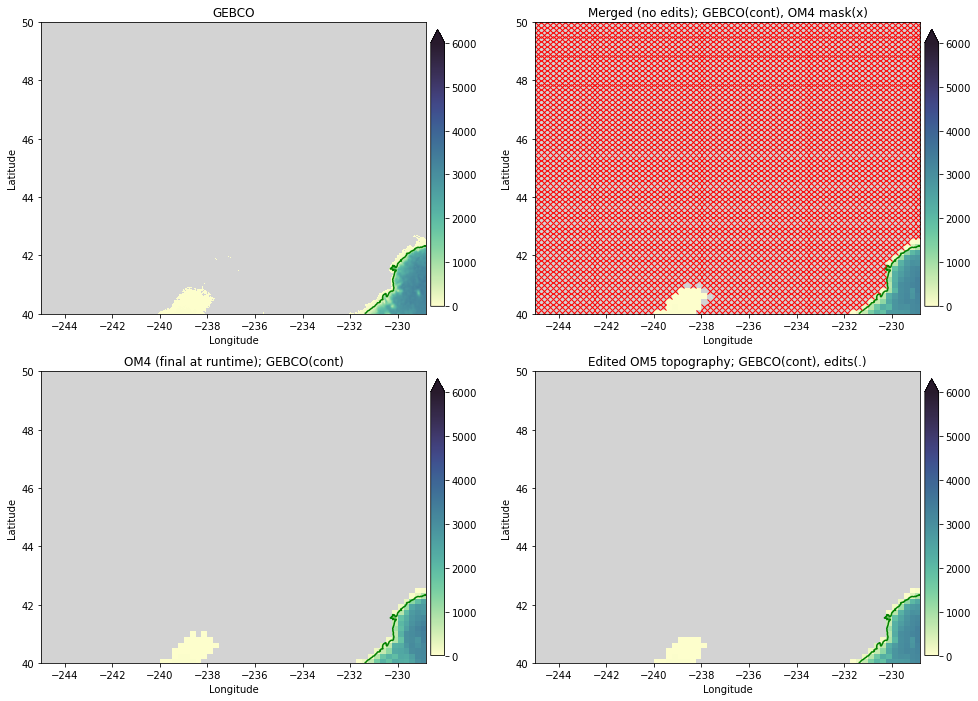

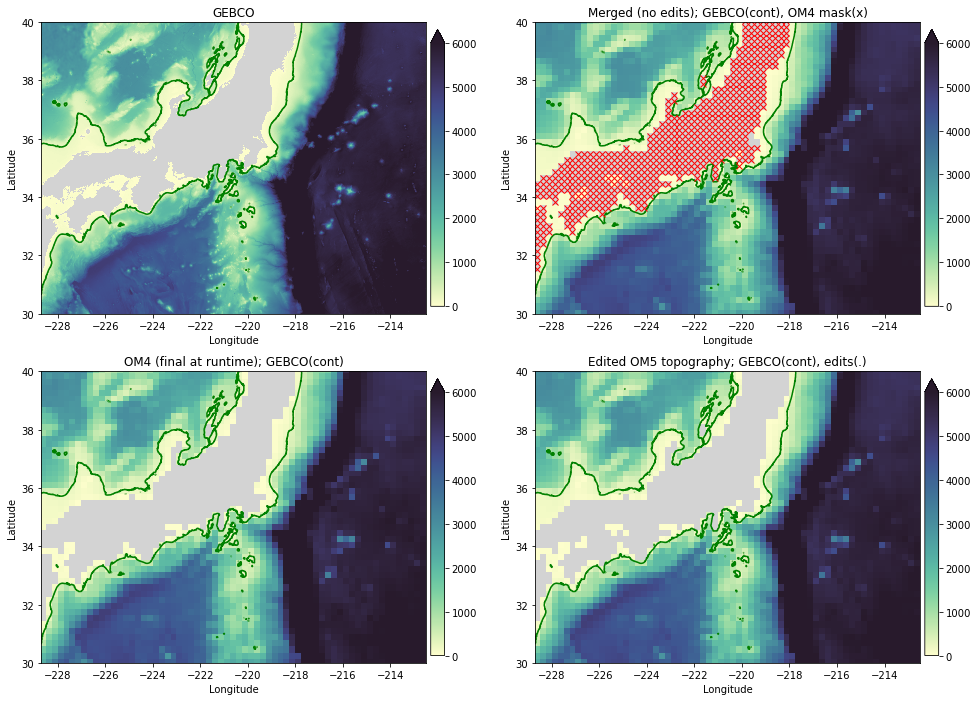

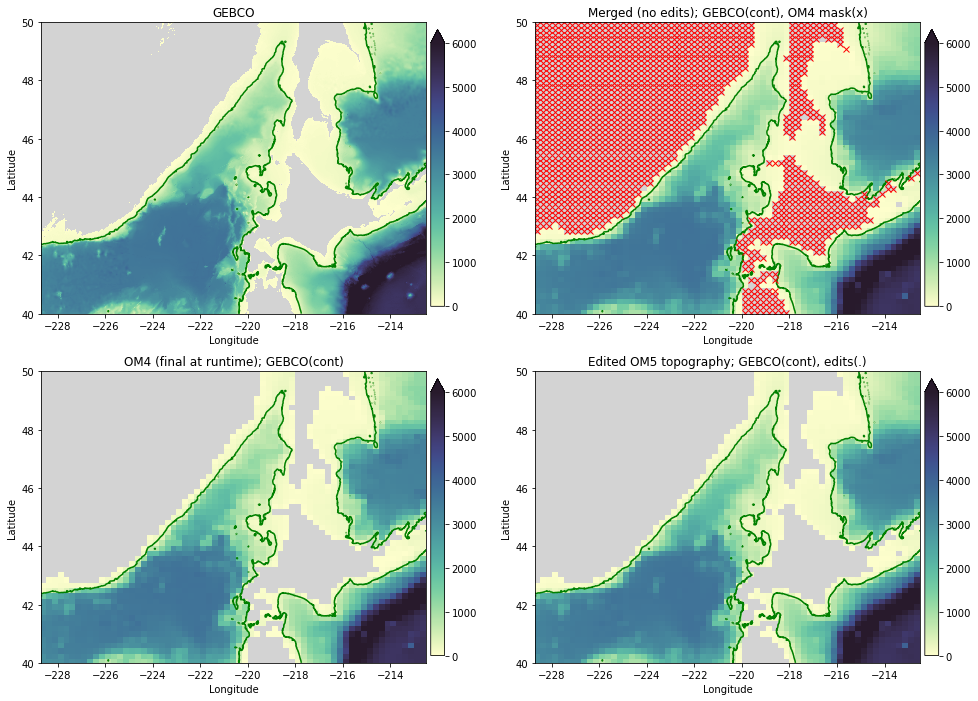

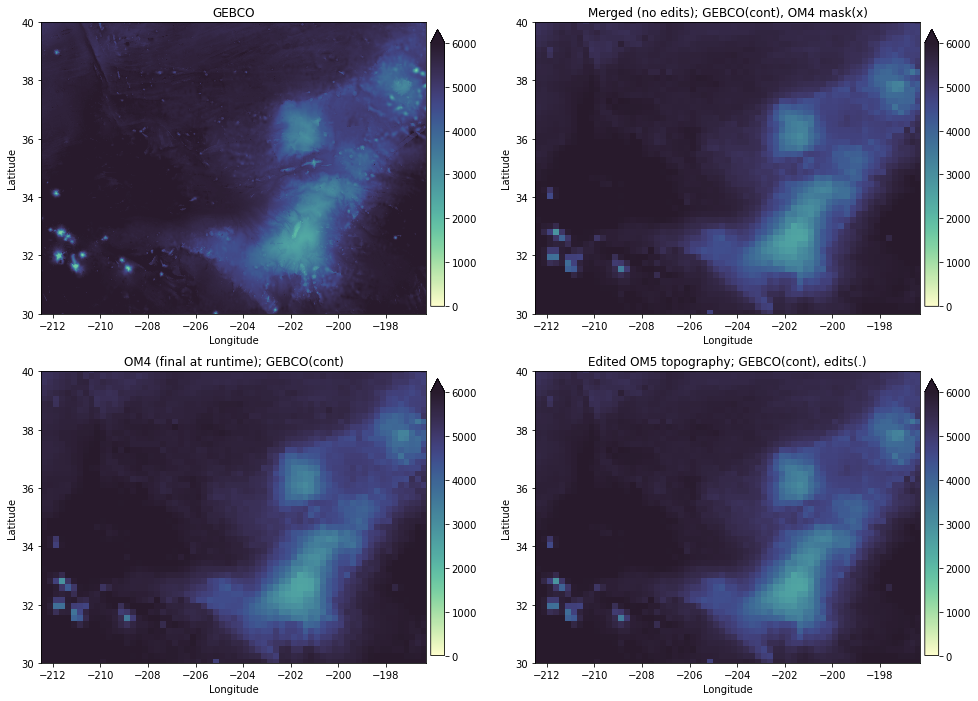

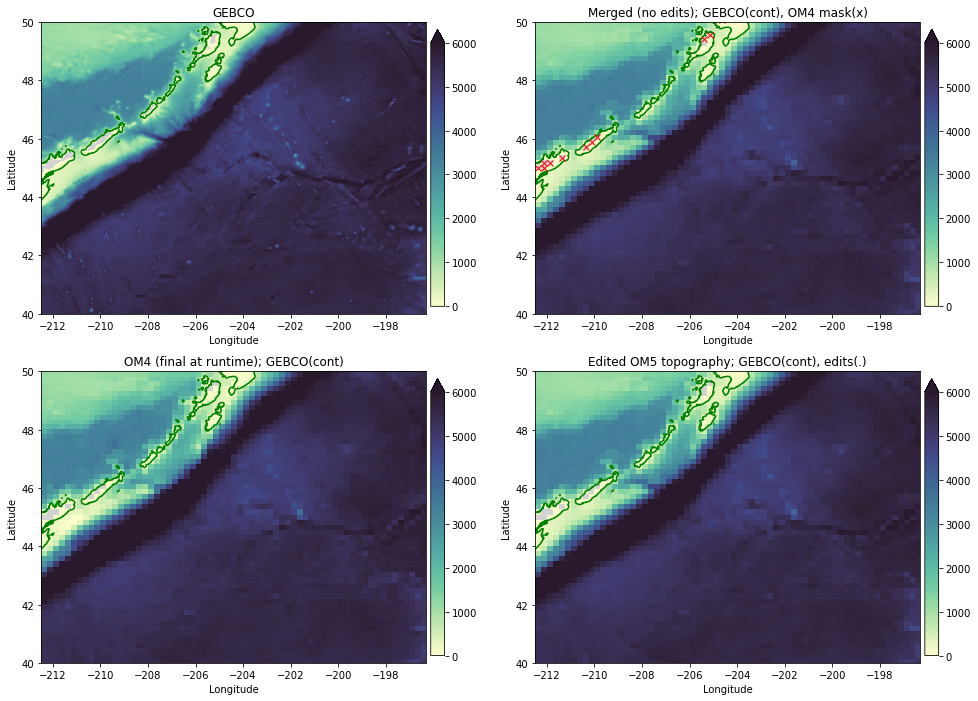

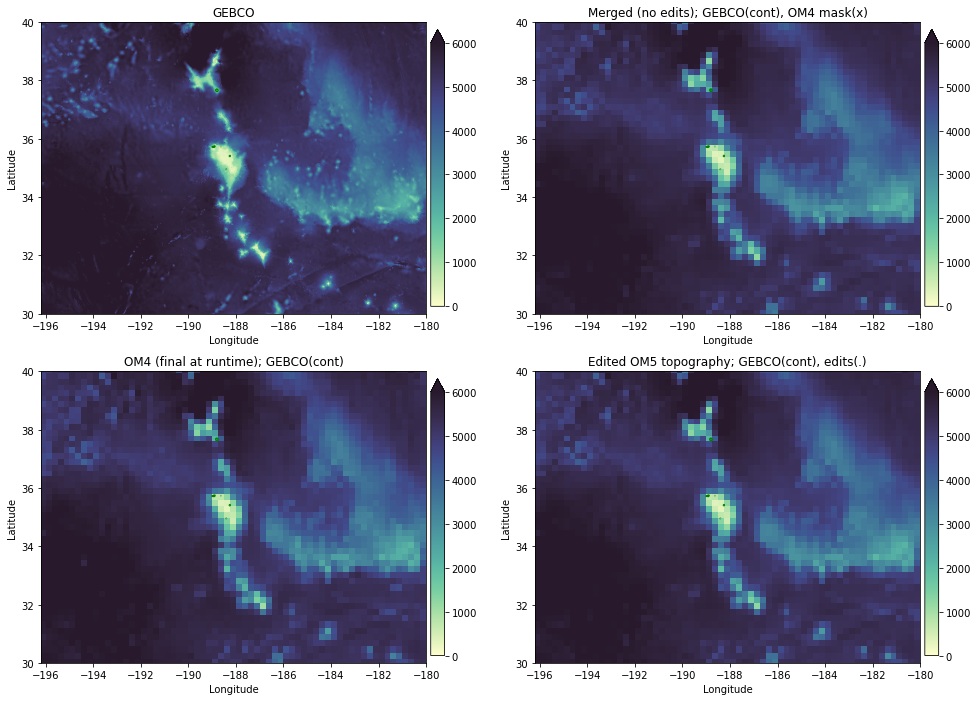

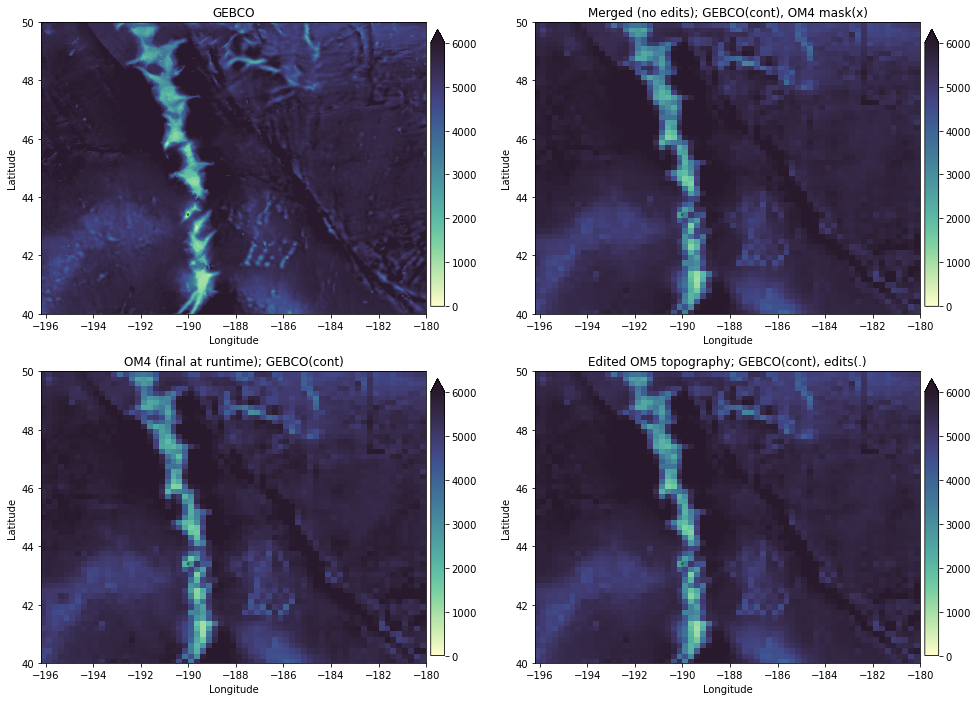

In [8]:
xint = divide_interval(-245,-180,4)
yint = divide_interval(30,50,2)

depths = [200, 6000, 6000, 6000, 6000, 6000, 6000, 6000]

count = 0
for nx,xrng in enumerate(xint):
    for ny, yrng in enumerate(yint):
        print(xrng)
        try:
            region = Region(xrng[0], yrng[0], width_lon=xrng[1], width_lat=yrng[1])
            map_region(region, 0, depths[count], GEBCO, OM4, OM5, '', gebco_contours=[250],text_depths=False)
            count+=1
        except:
            pass

Gebco (js:je,is:ie) = 30239:31439,13800:15000
OM4 model (js:je,is:ie) = 657:684,228:250
OM5 model (js:je,is:ie) = 738:765,228:250
Using xlim = (-242.5, -237.5) ylim = (36.0, 41.0)


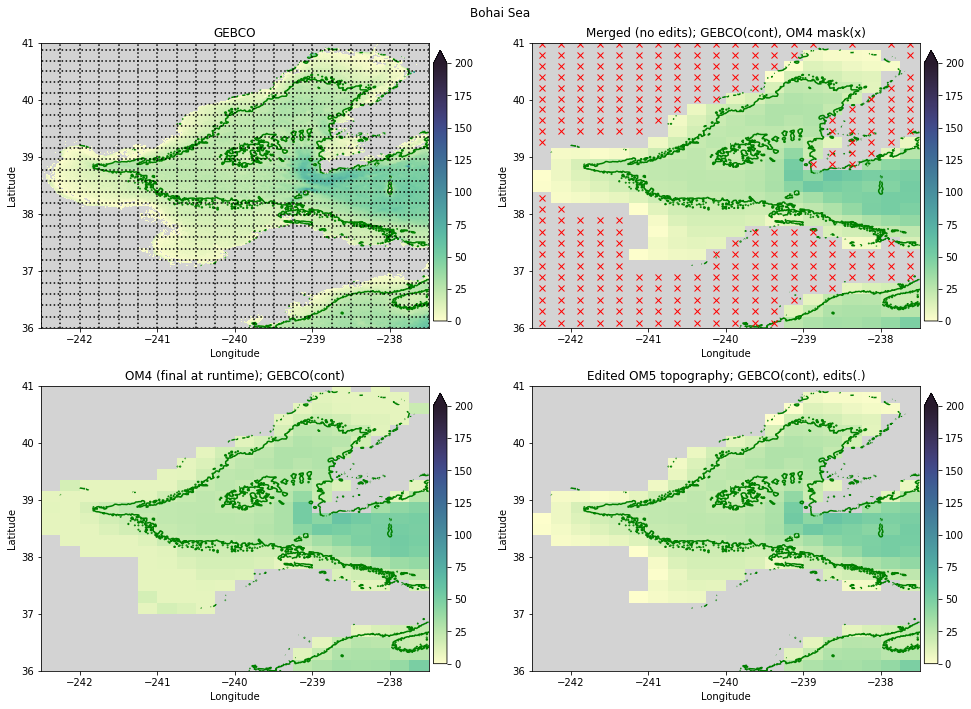

In [9]:
reglabel = "Bohai Sea"

region = Region(-240, 38.5, width_lon=5, width_lat=5)
map_region(region, 0, 200, GEBCO, OM4, OM5, reglabel, gebco_contours=[20],text_depths=False);

Gebco (js:je,is:ie) = 29639:29879,16800:17280
OM4 model (js:je,is:ie) = 644:651,278:288
OM5 model (js:je,is:ie) = 725:732,278:288
Using xlim = (-230.0, -228.0) ylim = (33.5, 34.5)


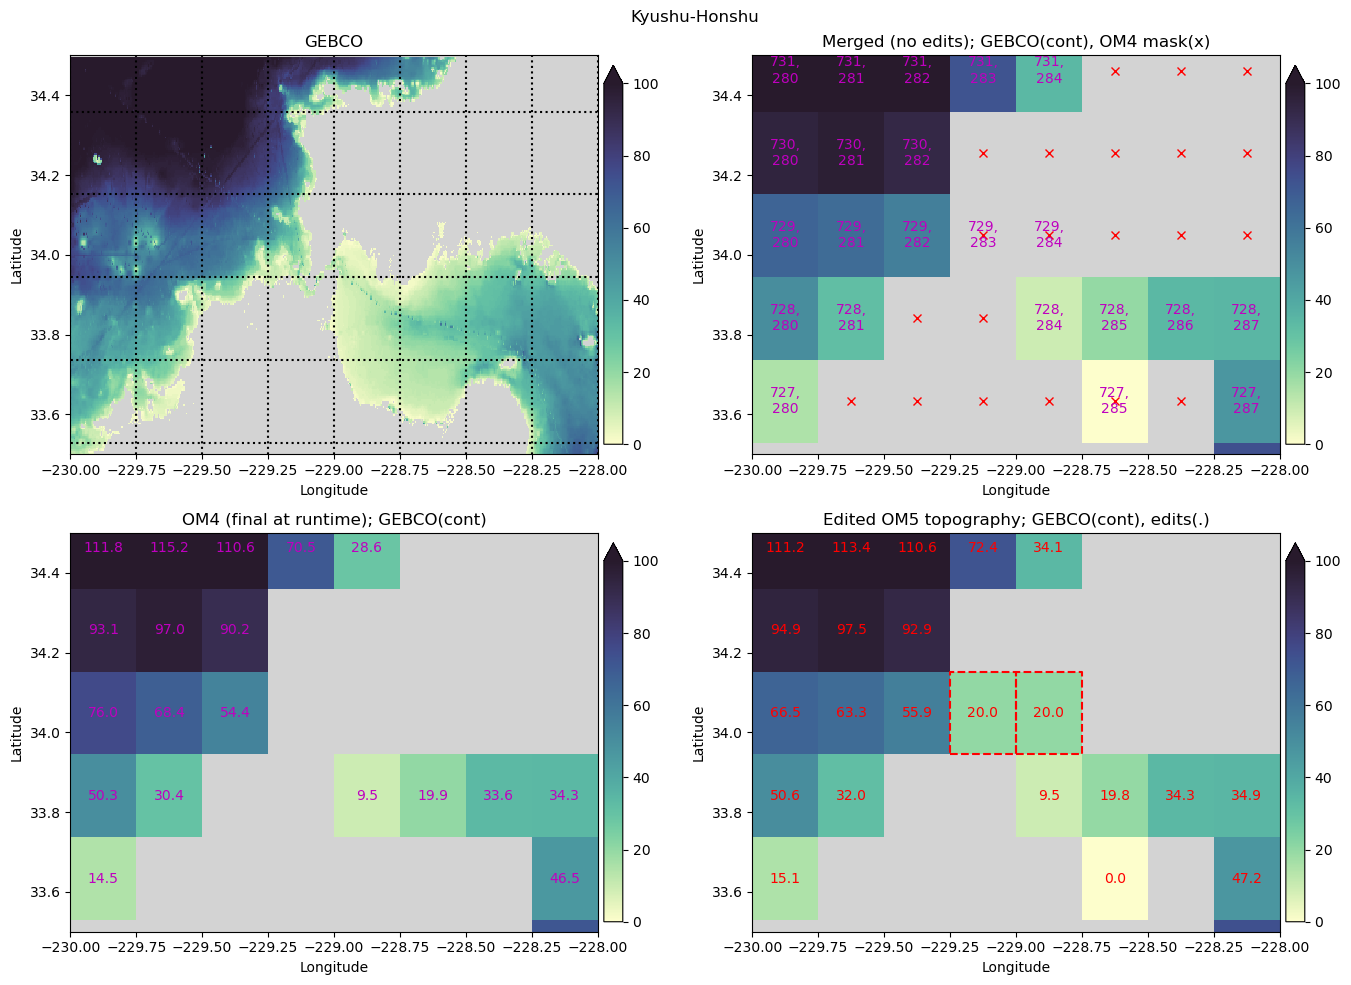

In [10]:
# Kyushu from Honshu Japanese islands (no edits; keep them linked) 
# The islands were linked in OM4, but create a strait

region = Region(-229, 34., width_lon=2, width_lat=1.0)

OM5.reset(region)
OM5.depth[729,283] = 20.0
OM5.depth[729,284] = 20.0

map_region(region, 0, 100, GEBCO, OM4, OM5, 'Kyushu-Honshu', gebco_contours=[250] )

Gebco (js:je,is:ie) = 29579:30059,17520:18120
OM4 model (js:je,is:ie) = 643:655,290:302
OM5 model (js:je,is:ie) = 724:736,290:302
Using xlim = (-227.0, -224.5) ylim = (33.25, 35.25)


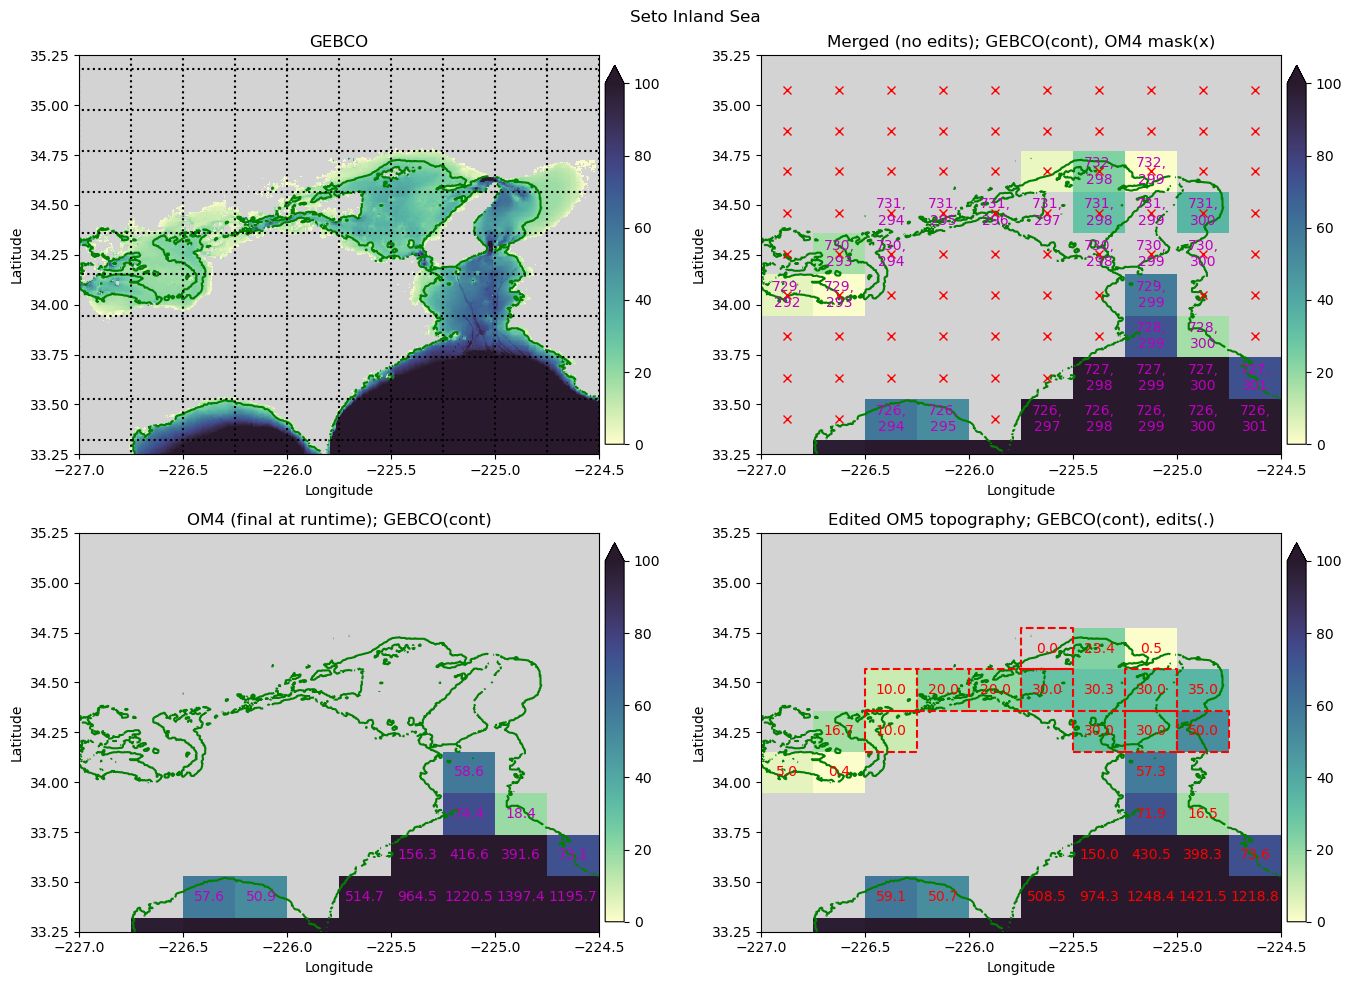

In [11]:
# Seto Inland Sea - Remove island in Osaka Bay

region = Region(-225.75, 34.25, width_lon=2.5, width_lat=2)

OM5.reset(region)
OM5.depth[730,298] = 30.0
OM5.depth[730,299] = 30.0
OM5.depth[730,300] = 50.0
#OM5.depth[732,300] = 30.0

OM5.depth[732,297] = 0.0
OM5.depth[731,297] = 30.0
OM5.depth[731,299] = 30.0
OM5.depth[730,294] = 10
OM5.depth[731,294] = 10
OM5.depth[731,295] = 20
OM5.depth[731,296] = 20
map_region(region, 0, 100, GEBCO, OM4, OM5, 'Seto Inland Sea', gebco_contours=[20] )

Gebco (js:je,is:ie) = 31331:31691,19140:19740
OM4 model (js:je,is:ie) = 680:690,317:329
OM5 model (js:je,is:ie) = 761:771,317:329
Using xlim = (-220.25, -217.75) ylim = (40.55, 42.05)


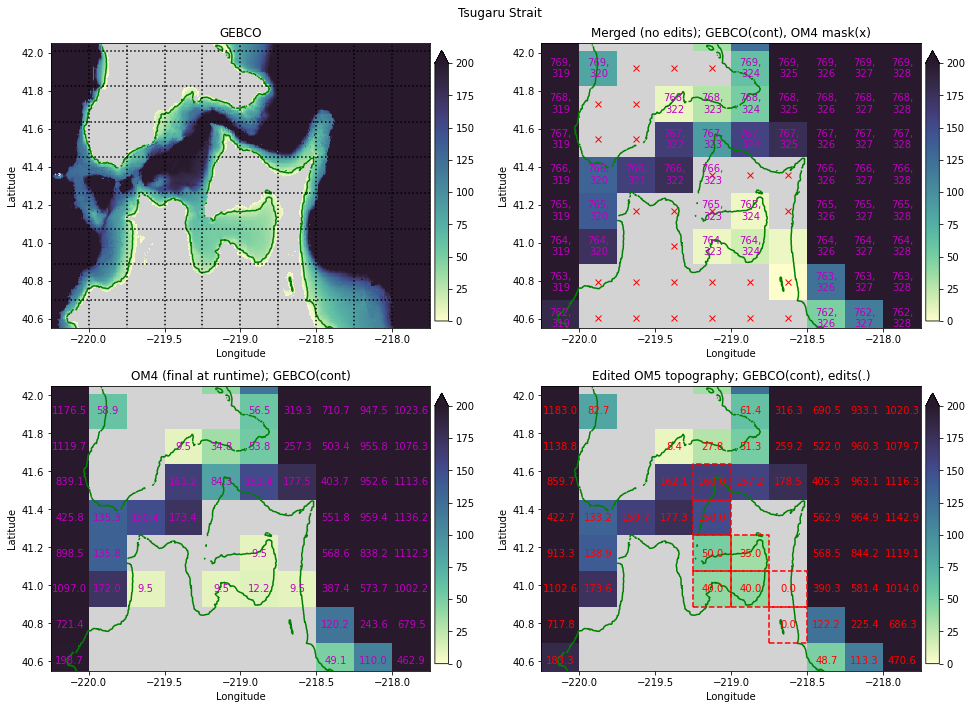

In [21]:
reglabel = "Tsugaru Strait"

region = Region(-219, 41.3, width_lon=2.5, width_lat=1.5)

OM5.reset(region)
OM5.depth[767,323] = 160.0
OM5.depth[764,325] = 0.0
OM5.depth[763,325] = 0.0
OM5.depth[766,323] = 150.0
OM5.depth[765,324] = 35.0
OM5.depth[764,324] = 40.0
OM5.depth[764,323] = 40.0
OM5.depth[765,323] = 50.0


map_region(region, 0, 200, GEBCO, OM4, OM5, reglabel, gebco_contours=[20],text_depths=True);

Gebco (js:je,is:ie) = 31199:33599,20160:22560
OM4 model (js:je,is:ie) = 677:736,334:376
OM5 model (js:je,is:ie) = 758:817,334:376
Using xlim = (-216.0, -206.0) ylim = (40.0, 50.0)


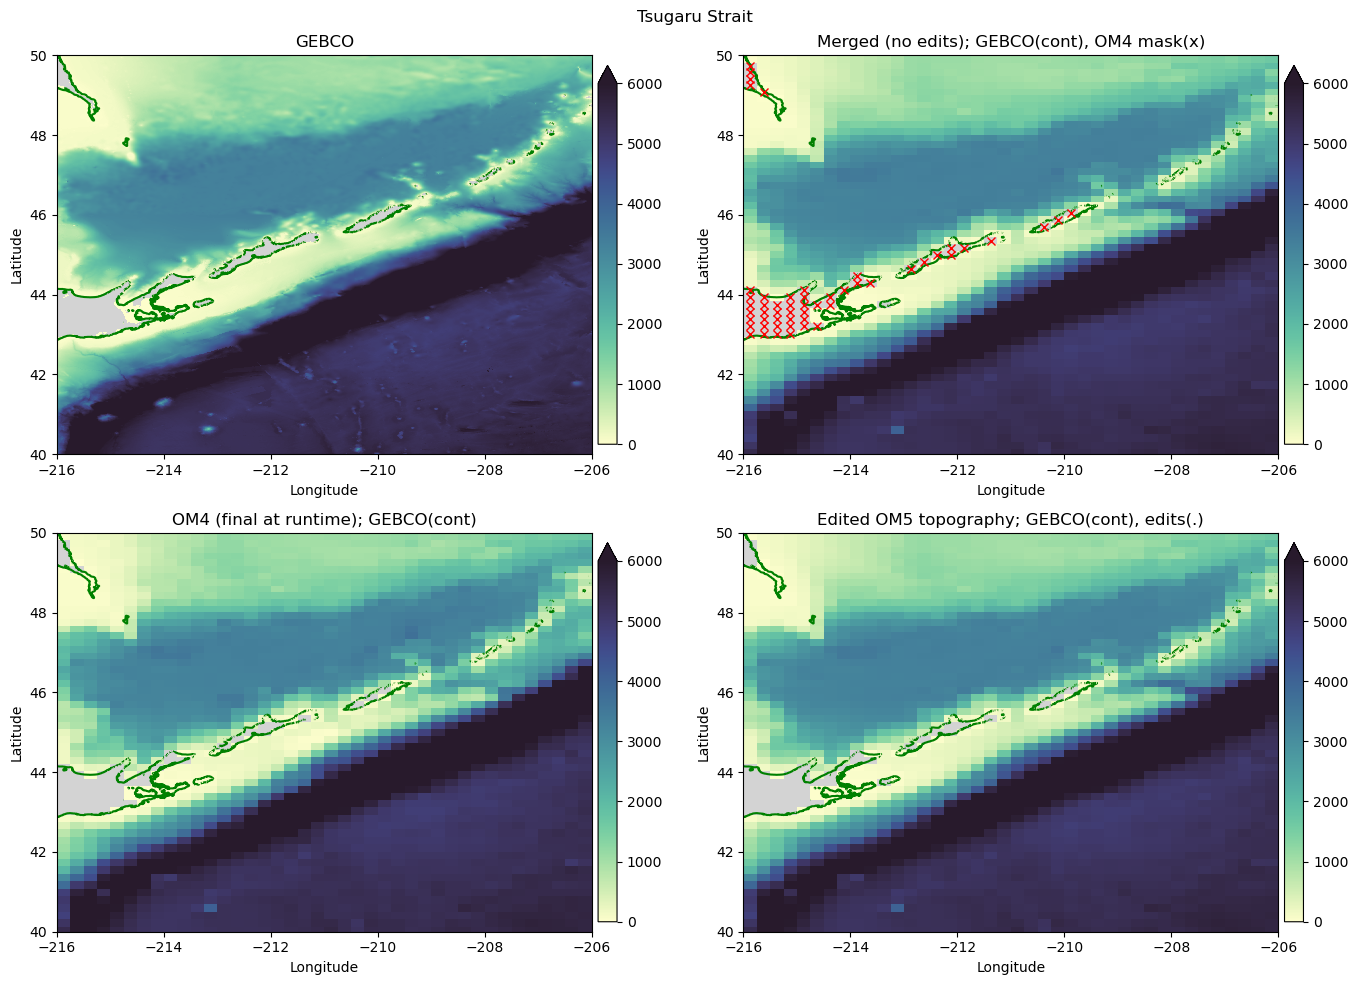

In [13]:
# NO EDITS
reg = "Kuril Islands South"
region = Region(-211, 45, width_lon=10, width_lat=10)
map_region(region, 0, 6000, GEBCO, OM4, OM5, reglabel, gebco_contours=[20],text_depths=False)

Gebco (js:je,is:ie) = 32424:32904,21480:21960
OM4 model (js:je,is:ie) = 705:718,356:366
OM5 model (js:je,is:ie) = 786:799,356:366
Using xlim = (-210.5, -208.5) ylim = (45.1, 47.1)


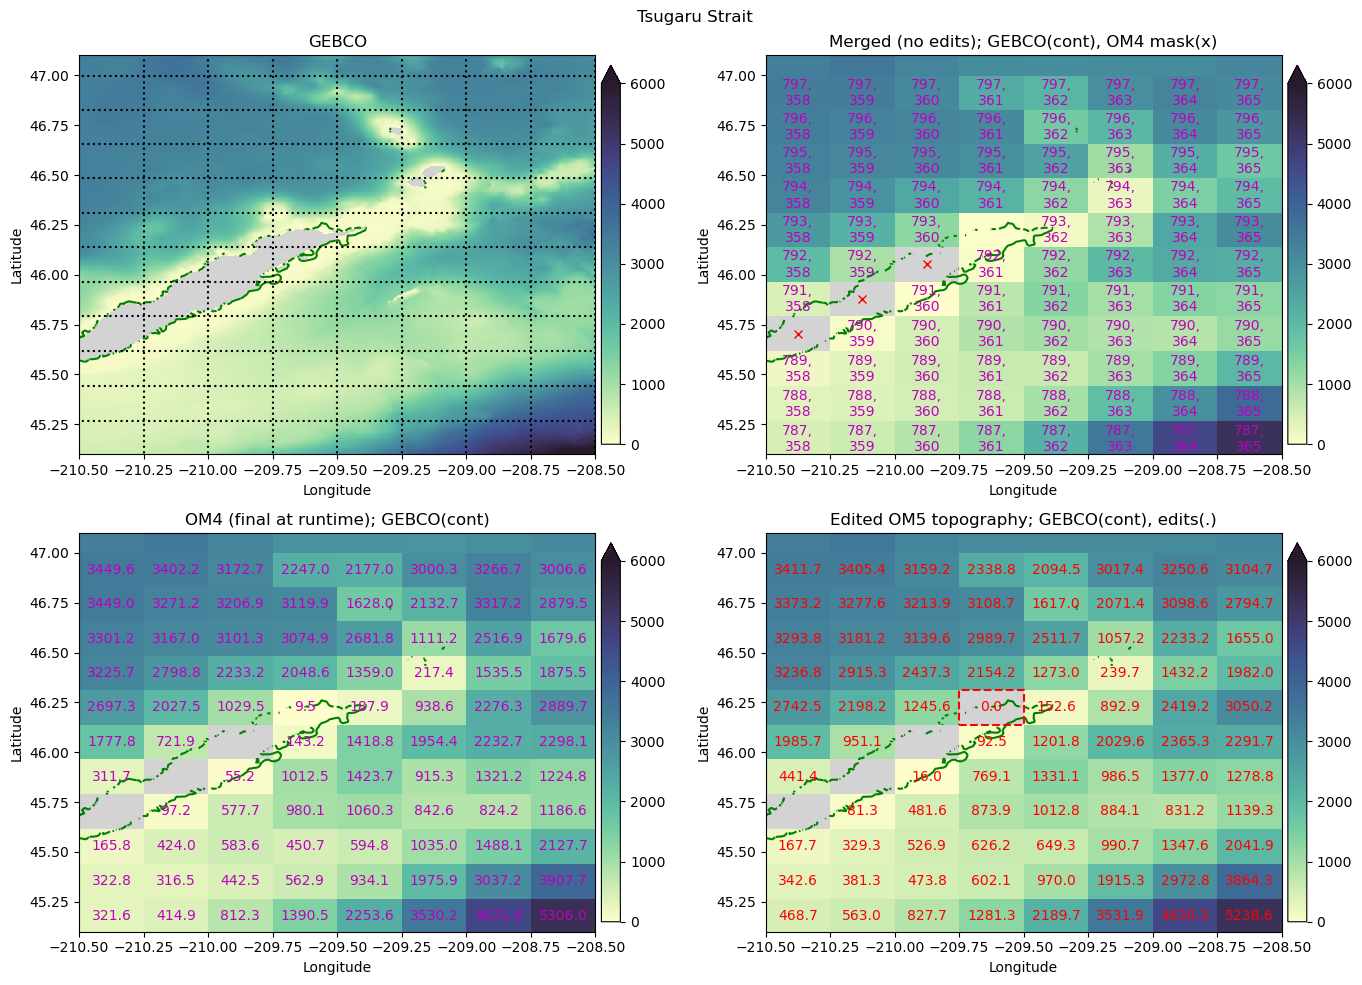

In [14]:
reg = "Kuril Islands South"

region = Region(-209.5, 46.1, width_lon=2, width_lat=2)

OM5.reset(region)
OM5.depth[793,361] = 0.0

map_region(region, 0, 6000, GEBCO, OM4, OM5, reglabel, gebco_contours=[20],text_depths=True)

Gebco (js:je,is:ie) = 32519:33719,22200:23400
OM4 model (js:je,is:ie) = 707:739,368:390
OM5 model (js:je,is:ie) = 788:820,368:390
Using xlim = (-207.5, -202.5) ylim = (45.5, 50.5)


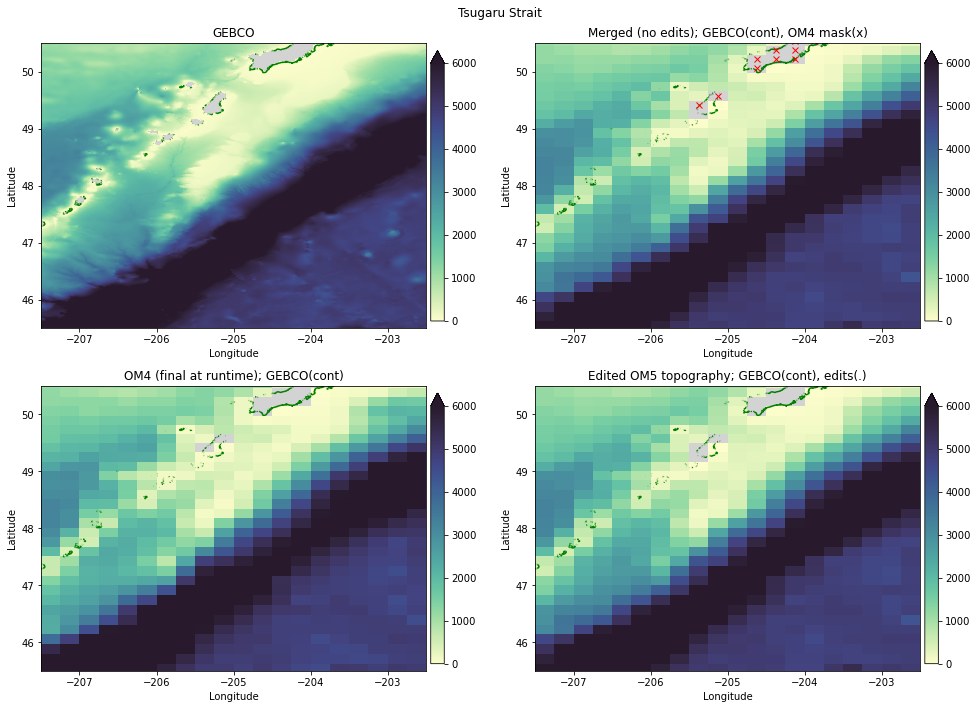

In [22]:
# NO EDITS
reg = "Kuril Islands North"
region = Region(-205, 48, width_lon=5, width_lat=5)
map_region(region, 0, 6000, GEBCO, OM4, OM5, reglabel, gebco_contours=[20],text_depths=False)

Gebco (js:je,is:ie) = 32819:33611,22043:22835
OM4 model (js:je,is:ie) = 714:736,366:381
OM5 model (js:je,is:ie) = 795:817,366:381
Using xlim = (-208.15, -204.85) ylim = (46.75, 50.05)


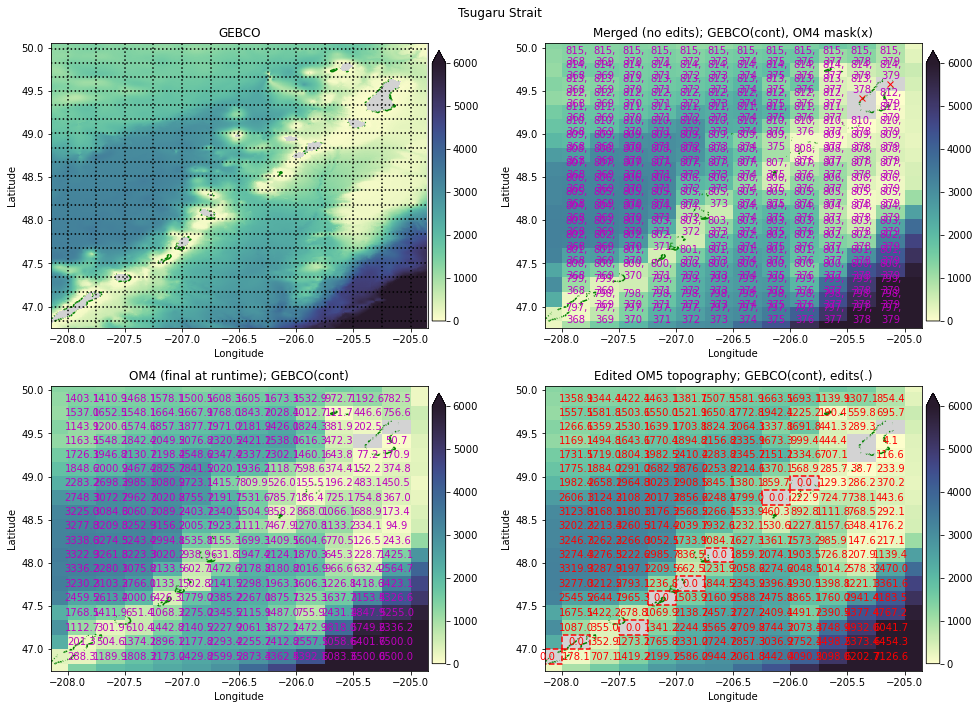

In [23]:
reg = "Kuril Islands North"
region = Region(-206.5, 48.4, width_lon=3.3, width_lat=3.3)

OM5.reset(region)
OM5.depth[809,376] = 0.0
OM5.depth[808,375] = 0.0
OM5.depth[797,367] = 0.0
OM5.depth[798,368] = 0.0
OM5.depth[799,370] = 0.0
OM5.depth[801,371] = 0.0
OM5.depth[802,372] = 0.0
OM5.depth[804,373] = 0.0

map_region(region, 0, 6000, GEBCO, OM4, OM5, reglabel, gebco_contours=[20],text_depths=True)

Gebco (js:je,is:ie) = 32975:33455,22200:22680
OM4 model (js:je,is:ie) = 718:732,368:378
OM5 model (js:je,is:ie) = 799:813,368:378
Using xlim = (-207.5, -205.5) ylim = (47.4, 49.4)


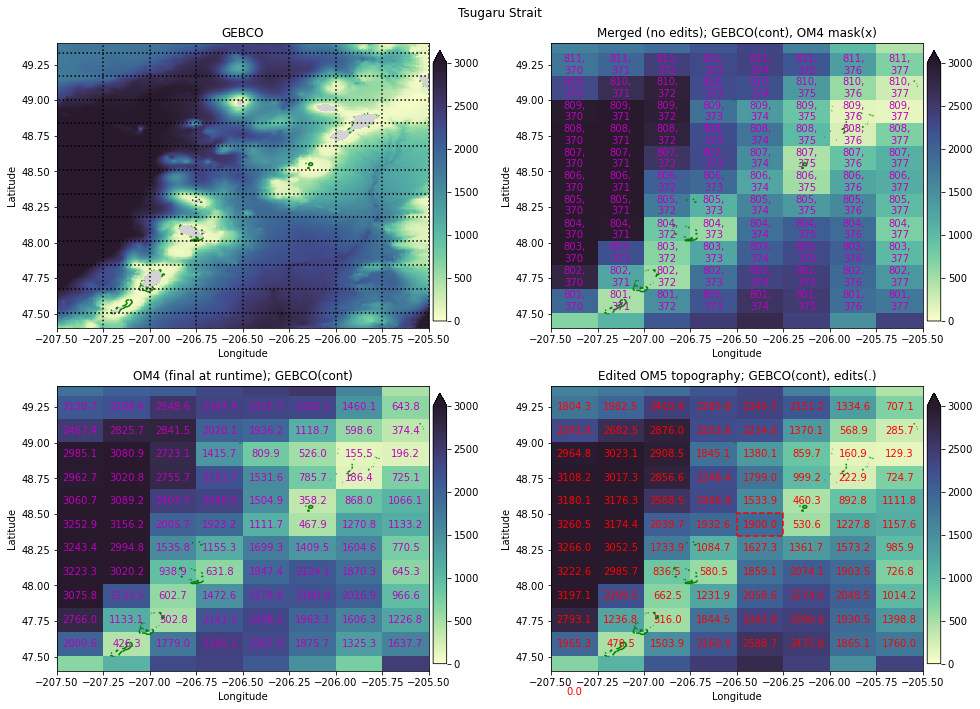

In [30]:
reg = "Kuril Islands North Channel"
region = Region(-206.5, 48.4, width_lon=2, width_lat=2)

OM5.reset(region)
OM5.depth[806,374] = 1900.0

map_region(region, 0, 3000, GEBCO, OM4, OM5, reglabel, gebco_contours=[20],text_depths=True)

Gebco (js:je,is:ie) = 33899:34259,19380:19740
OM4 model (js:je,is:ie) = 742:753,321:329
OM5 model (js:je,is:ie) = 823:834,321:329
Using xlim = (-219.25, -217.75) ylim = (51.25, 52.75)


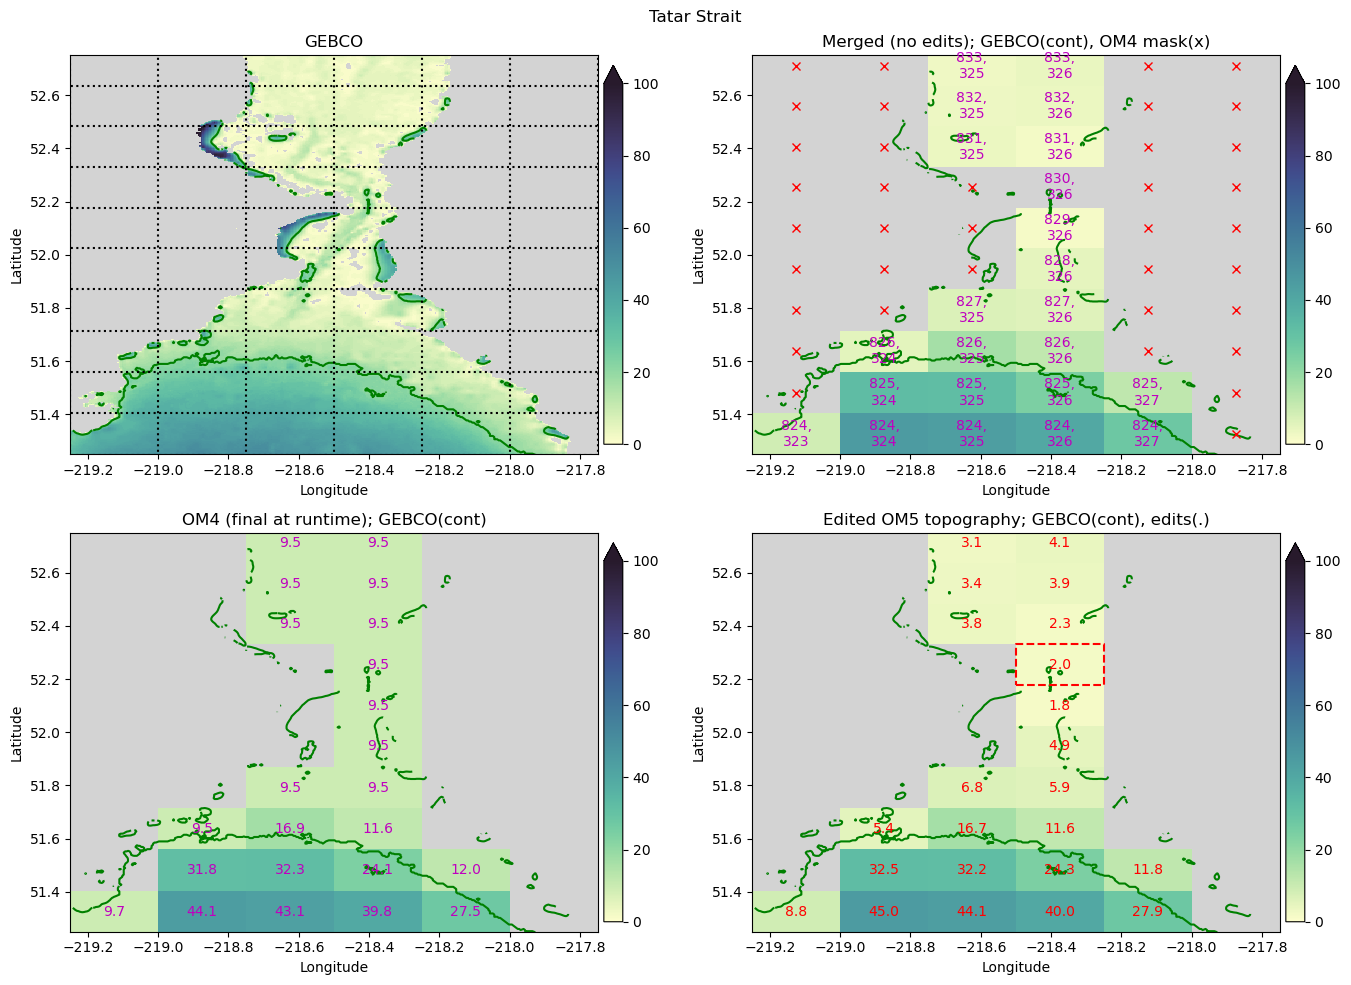

In [17]:
# Open look at Tatar Strait
# THIS EDIT BELONGS IN REGION #22 !!!!!

region = Region(-218.5, 52., width_lon=1.5, width_lat=1.5)

OM5.reset(region)
OM5.depth[830,326] = 2.0

map_region(region, 0, 100, GEBCO, OM4, OM5, 'Tatar Strait', gebco_contours=[20] )

In [18]:
OM5.write_nc("om5_topo_edits_region_18.nc")

New Depth at jEdit=729 iEdit=283 set to 20.0
New Depth at jEdit=729 iEdit=284 set to 20.0
New Depth at jEdit=730 iEdit=294 set to 10.0
New Depth at jEdit=730 iEdit=298 set to 30.0
New Depth at jEdit=730 iEdit=299 set to 30.0
New Depth at jEdit=730 iEdit=300 set to 50.0
New Depth at jEdit=731 iEdit=294 set to 10.0
New Depth at jEdit=731 iEdit=295 set to 20.0
New Depth at jEdit=731 iEdit=296 set to 20.0
New Depth at jEdit=731 iEdit=297 set to 30.0
New Depth at jEdit=731 iEdit=299 set to 30.0
New Depth at jEdit=732 iEdit=297 set to 0.0
New Depth at jEdit=767 iEdit=323 set to 160.0
New Depth at jEdit=793 iEdit=361 set to 0.0
New Depth at jEdit=797 iEdit=367 set to 0.0
New Depth at jEdit=798 iEdit=368 set to 0.0
New Depth at jEdit=799 iEdit=370 set to 0.0
New Depth at jEdit=801 iEdit=371 set to 0.0
New Depth at jEdit=802 iEdit=372 set to 0.0
New Depth at jEdit=804 iEdit=373 set to 0.0
New Depth at jEdit=808 iEdit=375 set to 0.0
New Depth at jEdit=809 iEdit=376 set to 0.0
New Depth at jEdit=